<a href="https://colab.research.google.com/github/anshthakare16/bml-/blob/main/BML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone "https://github.com/anshthakare16/bml-"

fatal: destination path 'bml-' already exists and is not an empty directory.


In [ ]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/hi.csv")  # Ensure the file path is correct
print("First 5 rows of data:")
print(df.head())

# Data Cleaning
df.dropna()  # Drop rows with missing values
df.drop_duplicates()  # Drop duplicate rows
print("\nData after cleaning:")
print(df)

# Dataset Info
print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nChecking for Null Values:")
print(df.isnull().sum())


#This method counts the number of non-null entries in a specific column.
print(df['Heart_Attack_Risk'].count())

from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = ordinal_encoder.fit_transform(df[categorical_columns])
print("\nData after encoding categorical columns:")
print(df.head())

# Feature Scaling (Normalization & Standardization)
# Selecting only numerical columns for scaling
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\nNumerical Columns for Scaling:", numeric_columns)

# Normalization
normalizer = MinMaxScaler()
normalized_data = normalizer.fit_transform(df[numeric_columns])

# Standardization
standardizer = StandardScaler()
standardized_data = standardizer.fit_transform(df[numeric_columns])

# Print Results
#print("\nOriginal Data (Numerical Columns):\n", df[numeric_columns].head())
#print("\nNormalized Data (First 5 Rows):\n", normalized_data[:5])
#print("\nStandardized Data (First 5 Rows):\n", standardized_data[:5])

# Feature and Target Selection
# Feature and Target Selection
X = df[['Hypertension','Diabetes','Resting_BP','ECG_Results']].values  # Features # Use square brackets to select columns
y = df['Heart_Attack_Risk'].values  # Target

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
model.score(X_test, y_test)



In [4]:
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB


dataset = load_iris()

# Initialize and fit the model
model = GaussianNB()
model.fit(dataset.data, dataset.target)

# Make predictions
expected = dataset.target
predicted = model.predict(dataset.data)

accuracy = metrics.accuracy_score(expected, predicted)
print("Accuracy:", accuracy)

# Print confusion matrix
confusion_matrix = metrics.confusion_matrix(expected, predicted)
print("Confusion Matrix:\n", confusion_matrix)


Accuracy: 0.96
Confusion Matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


[True, False, false]
[False, true , true]
[False, true , true]

# skill experiment **5**

Decision Tree Accuracy: 37.47%
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.20      0.21      0.21      2986
           1       0.50      0.48      0.49      7567
           2       0.29      0.30      0.30      4447

    accuracy                           0.37     15000
   macro avg       0.33      0.33      0.33     15000
weighted avg       0.38      0.37      0.38     15000



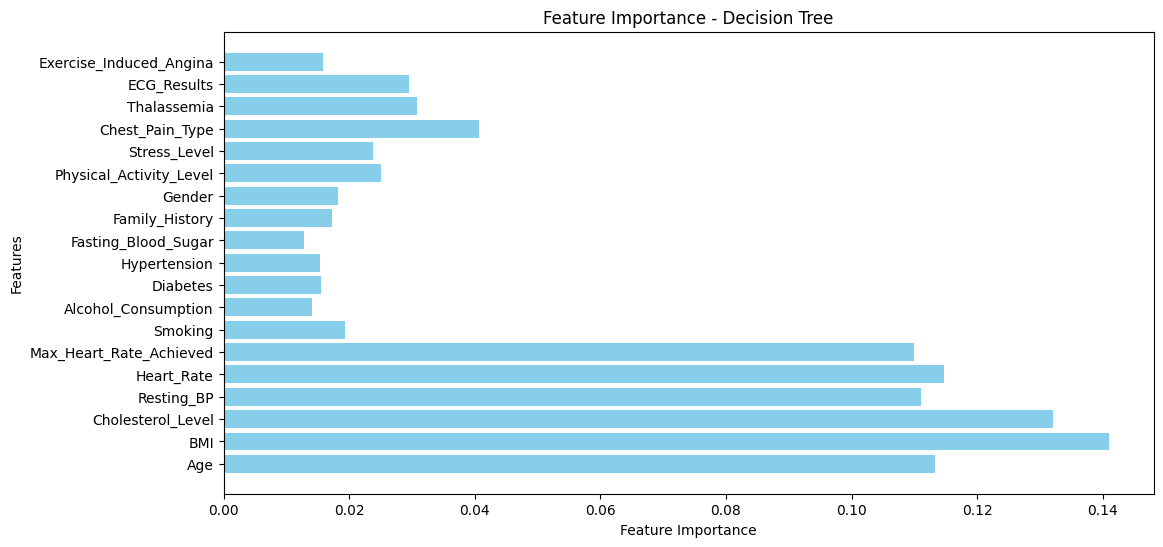

In [21]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/hi2.csv"  # Update path if needed
data = pd.read_csv(file_path)

# Encode categorical features
label_cols = ['Gender', 'Physical_Activity_Level', 'Stress_Level', 'Chest_Pain_Type',
              'Thalassemia', 'ECG_Results', 'Heart_Attack_Risk']

le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

# Define features and target
features = ['Age', 'BMI', 'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Max_Heart_Rate_Achieved',
            'Smoking', 'Alcohol_Consumption', 'Diabetes', 'Hypertension', 'Fasting_Blood_Sugar',
            'Family_History', 'Gender', 'Physical_Activity_Level', 'Stress_Level', 'Chest_Pain_Type',
            'Thalassemia', 'ECG_Results', 'Exercise_Induced_Angina']

target = 'Heart_Attack_Risk'
X, y = data[features], data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### --- Decision Tree Classifier ---
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_acc * 100:.2f}%")
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))

feature_importance = dt_model.feature_importances_
plt.figure(figsize=(12, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Decision Tree')
plt.show()


# **skill expermient 7**

KNN Accuracy: 40.62%
KNN Report:
               precision    recall  f1-score   support

           0       0.19      0.21      0.20      2986
           1       0.50      0.63      0.56      7567
           2       0.30      0.16      0.21      4447

    accuracy                           0.41     15000
   macro avg       0.33      0.33      0.32     15000
weighted avg       0.38      0.41      0.38     15000



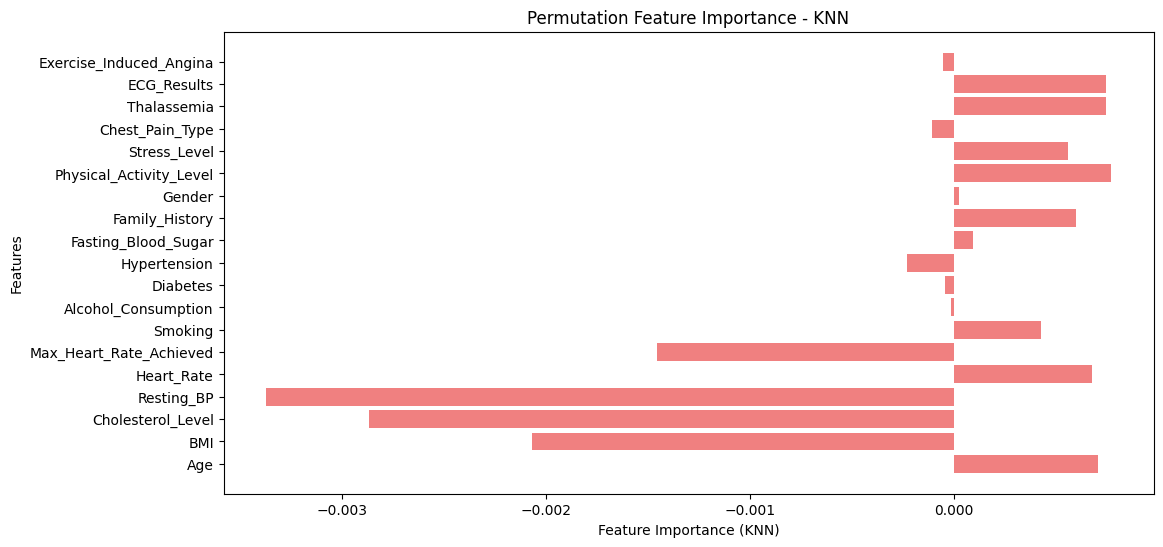

In [23]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/hi2.csv"  # Update path if needed
data = pd.read_csv(file_path)

# Encode categorical features
label_cols = ['Gender', 'Physical_Activity_Level', 'Stress_Level', 'Chest_Pain_Type',
              'Thalassemia', 'ECG_Results', 'Heart_Attack_Risk']

le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

# Define features and target
features = ['Age', 'BMI', 'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Max_Heart_Rate_Achieved',
            'Smoking', 'Alcohol_Consumption', 'Diabetes', 'Hypertension', 'Fasting_Blood_Sugar',
            'Family_History', 'Gender', 'Physical_Activity_Level', 'Stress_Level', 'Chest_Pain_Type',
            'Thalassemia', 'ECG_Results', 'Exercise_Induced_Angina']

target = 'Heart_Attack_Risk'
X, y = data[features], data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- KNN Classifier ---
k = 5  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# --- Evaluate KNN Model ---
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_acc * 100:.2f}%")
print("KNN Report:\n", classification_report(y_test, y_pred_knn))

# --- Feature Importance for KNN using Permutation ---
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(knn_model, X_test, y_test, n_repeats=5, random_state=42)

# Plot Permutation Feature Importance
feature_importance_knn = perm_importance.importances_mean
plt.figure(figsize=(12, 6))
plt.barh(features, feature_importance_knn, color='lightcoral')
plt.xlabel('Feature Importance (KNN)')
plt.ylabel('Features')
plt.title('Permutation Feature Importance - KNN')
plt.show()
